In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [6]:
X_train[0].shape

(32, 32, 3)

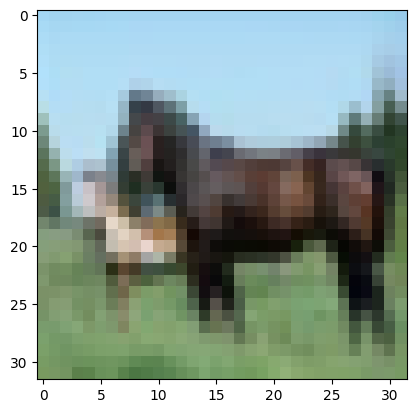

In [8]:
plt.imshow(X_train[12])

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_test.shape

(10000, 32, 32, 3)

In [12]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [15]:
y_train[0]

array([6], dtype=uint8)

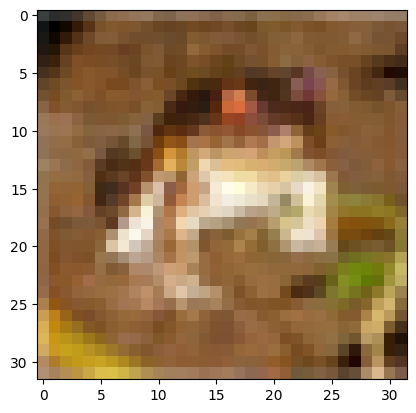

In [18]:
plt.imshow(X_train[0])

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [30]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

# DENSE LAYERS
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [32]:
model.fit(X_train, y_cat_train, epochs=15, validation_data=(X_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.3735 - loss: 1.7212 - val_accuracy: 0.5266 - val_loss: 1.3231
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.5673 - loss: 1.2222 - val_accuracy: 0.6041 - val_loss: 1.1230
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.6271 - loss: 1.0610 - val_accuracy: 0.6349 - val_loss: 1.0457
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.6735 - loss: 0.9371 - val_accuracy: 0.6505 - val_loss: 1.0088
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.7058 - loss: 0.8437 - val_accuracy: 0.6280 - val_loss: 1.0721
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.7358 - loss: 0.7653 - val_accuracy: 0.6613 - val_loss: 1.0109


In [33]:
metrics = pd.DataFrame(model.history.history)

In [34]:
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.45392,1.512298,0.5266,1.323074
1,0.57946,1.190244,0.6041,1.123003
2,0.63204,1.048020,0.6349,1.045737
3,0.67266,0.941264,0.6505,1.008786
4,0.70468,0.847365,0.6280,1.072059
5,0.73290,0.771457,0.6613,1.010879


from matplotlib import pyplot as plt
metrics['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics['val_accuracy'].plot(kind='hist', bins=20, title='val_accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics['val_loss'].plot(kind='hist', bins=20, title='val_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics.plot(kind='scatter', x='accuracy', y='loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics.plot(kind='scatter', x='loss', y='val_accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics.plot(kind='scatter', x='val_accuracy', y='val_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accuracy']
  ys = series['loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = metrics.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accuracy']
  ys = series['val_accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = metrics.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('val_accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accuracy']
  ys = series['val_loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = metrics.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('val_loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['accuracy']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'accuracy'}, axis=1)
              .sort_values('accuracy', ascending=True))
  xs = counted['accuracy']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = metrics.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
metrics['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics['val_accuracy'].plot(kind='line', figsize=(8, 4), title='val_accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics['val_loss'].plot(kind='line', figsize=(8, 4), title='val_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

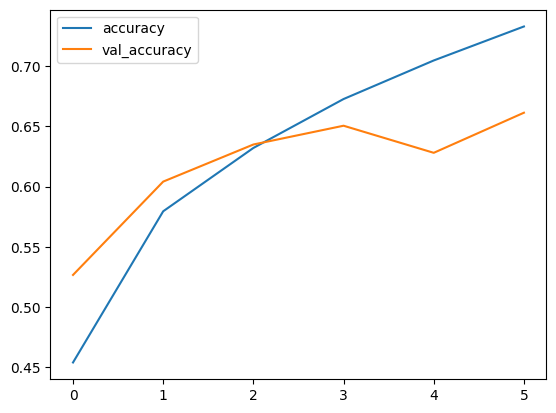

In [35]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

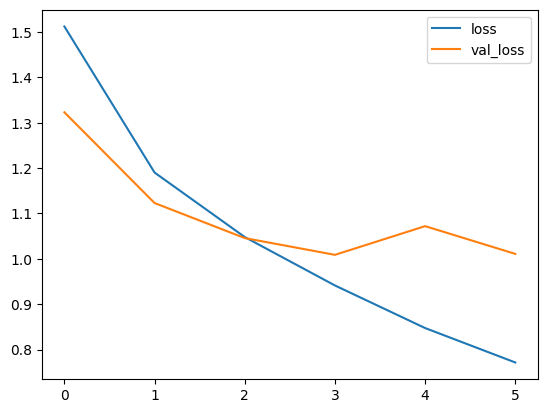

In [36]:
metrics[['loss','val_loss']].plot()

In [37]:
model.evaluate(X_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6651 - loss: 1.0076


[1.0108786821365356, 0.661300003528595]

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


In [41]:
print(classification_report(y_test,predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.68      0.78      0.72      1000
           1       0.85      0.69      0.76      1000
           2       0.63      0.47      0.54      1000
           3       0.41      0.49      0.45      1000
           4       0.62      0.64      0.63      1000
           5       0.53      0.63      0.58      1000
           6       0.66      0.84      0.74      1000
           7       0.78      0.66      0.72      1000
           8       0.83      0.70      0.76      1000
           9       0.76      0.72      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.68      0.66      0.66     10000
weighted avg       0.68      0.66      0.66     10000



In [42]:
confusion_matrix(y_test,predictions.argmax(axis=1))

array([[775,  13,  31,  39,  14,  13,  22,  14,  47,  32],
       [ 43, 690,  10,  33,  12,  15,  26,   6,  44, 121],
       [ 70,   2, 468, 118, 104, 110,  87,  25,   8,   8],
       [ 21,   6,  48, 492,  61, 222, 107,  24,   5,  14],
       [ 20,   1,  60,  90, 637,  48,  77,  56,  10,   1],
       [ 11,   2,  33, 185,  52, 630,  52,  26,   4,   5],
       [  4,   4,  38,  54,  31,  23, 837,   3,   2,   4],
       [ 22,   2,  25,  82,  84,  90,  23, 659,   3,  10],
       [124,  24,  15,  51,  14,  12,  14,   7, 704,  35],
       [ 54,  64,  10,  47,  13,  26,  23,  21,  21, 721]])

<Axes: >

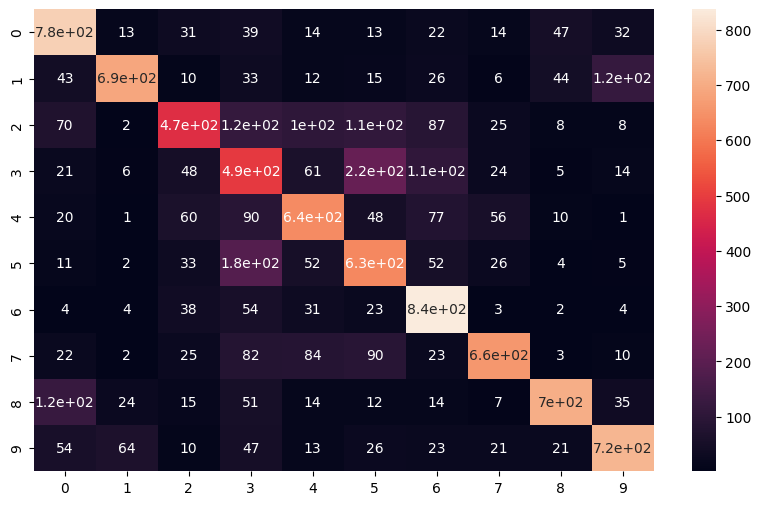

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions.argmax(axis=1)),annot=True)

In [51]:
my_image = X_test[16]

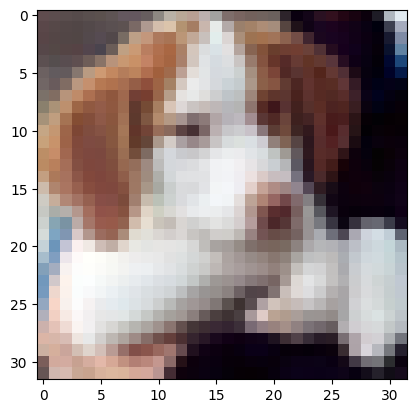

In [52]:
plt.imshow(my_image)

In [53]:
y_test[16]

array([5], dtype=uint8)

In [55]:
np.argmax(model.predict(my_image.reshape(1,32,32,3)),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


array([5])